1. Загрузить датасет в Python.



In [5]:
# импорт библиотек
import numpy as np
import pandas as pd

# загрузка данных из файла
data = pd.read_csv('income_evaluation.csv')
data.head(5)

,age,workclass,fnlwgt,education,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country,income
0,39,State-gov,77516,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,<=50K
1,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
2,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
3,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
4,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K


In [6]:
data.columns

Index(['age', ' workclass', ' fnlwgt', ' education', ' education-num',
       ' marital-status', ' occupation', ' relationship', ' race', ' sex',
       ' capital-gain', ' capital-loss', ' hours-per-week', ' native-country',
       ' income'],
      dtype='object')

2. Описать набор данных и решаемую задачу.


Необходимо решить задачу классификации по данным людей, определить, зарабатывает ли человек более 50 тысяч в год и разбить выборку на 2 класса

In [7]:
data.describe()

,age,fnlwgt,education-num,capital-gain,capital-loss,hours-per-week
count,32561.000000,3.256100e+04,32561.000000,32561.000000,32561.000000,32561.000000
mean,38.581647,1.897784e+05,10.080679,1077.648844,87.303830,40.437456
std,13.640433,1.055500e+05,2.572720,7385.292085,402.960219,12.347429
min,17.000000,1.228500e+04,1.000000,0.000000,0.000000,1.000000
25%,28.000000,1.178270e+05,9.000000,0.000000,0.000000,40.000000
50%,37.000000,1.783560e+05,10.000000,0.000000,0.000000,40.000000
75%,48.000000,2.370510e+05,12.000000,0.000000,0.000000,45.000000
max,90.000000,1.484705e+06,16.000000,99999.000000,4356.000000,99.000000


Минимальный возраст - 17

Максимальные часы работы в неделю - 99

Количество значений в столбце Education-num, как и во всей таблице - 32561

In [8]:
data[' education'].value_counts()

 HS-grad         10501
 Some-college     7291
 Bachelors        5355
 Masters          1723
 Assoc-voc        1382
 11th             1175
 Assoc-acdm       1067
 10th              933
 7th-8th           646
 Prof-school       576
 9th               514
 12th              433
 Doctorate         413
 5th-6th           333
 1st-4th           168
 Preschool          51
Name:  education, dtype: int64

что очевидно, больше всего людей с высшим школьным образованием

In [9]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32561 entries, 0 to 32560
Data columns (total 15 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   age              32561 non-null  int64 
 1    workclass       32561 non-null  object
 2    fnlwgt          32561 non-null  int64 
 3    education       32561 non-null  object
 4    education-num   32561 non-null  int64 
 5    marital-status  32561 non-null  object
 6    occupation      32561 non-null  object
 7    relationship    32561 non-null  object
 8    race            32561 non-null  object
 9    sex             32561 non-null  object
 10   capital-gain    32561 non-null  int64 
 11   capital-loss    32561 non-null  int64 
 12   hours-per-week  32561 non-null  int64 
 13   native-country  32561 non-null  object
 14   income          32561 non-null  object
dtypes: int64(6), object(9)
memory usage: 3.7+ MB


In [10]:
data.shape

(32561, 15)

В датасете 32561 элемент и 15 признаков, включая целевой

In [11]:
# строим матрицу корреляций
correll = data.corr()
correll

,age,fnlwgt,education-num,capital-gain,capital-loss,hours-per-week
age,1.000000,-0.076646,0.036527,0.077674,0.057775,0.068756
fnlwgt,-0.076646,1.000000,-0.043195,0.000432,-0.010252,-0.018768
education-num,0.036527,-0.043195,1.000000,0.122630,0.079923,0.148123
capital-gain,0.077674,0.000432,0.122630,1.000000,-0.031615,0.078409
capital-loss,0.057775,-0.010252,0.079923,-0.031615,1.000000,0.054256
hours-per-week,0.068756,-0.018768,0.148123,0.078409,0.054256,1.000000


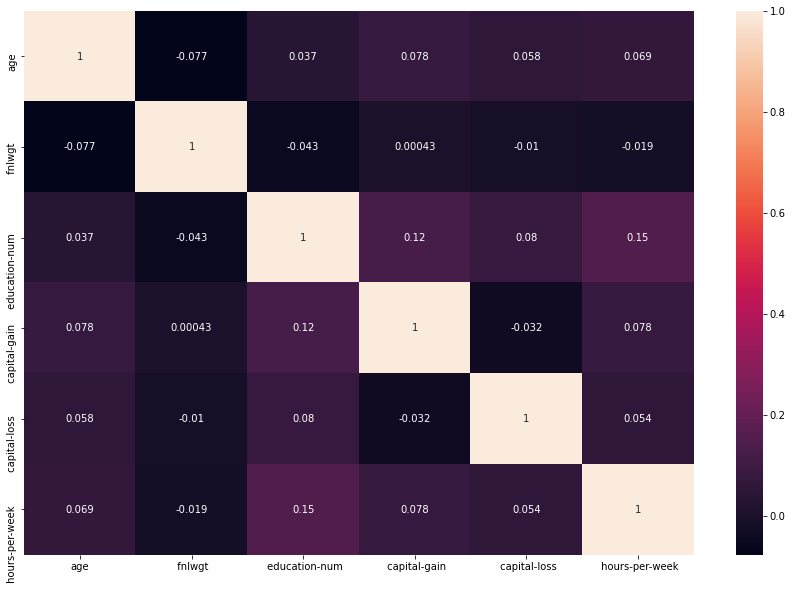

In [12]:
import seaborn as sns
import matplotlib.pyplot as plt

# строим тепловую карту корреляций
fig, ax = plt.subplots(figsize=(15,10))
sns.heatmap(correll, annot=True);

3. Выделить целевую переменную и факторные переменные.


Целевая переменная - признак income. Факторные переменные - остальные признаки

In [13]:
# создаем 2 новых датафрейма
y = pd.DataFrame(data[' income'])
x = pd.DataFrame(data.drop([' income'], axis=1))
x.head()

,age,workclass,fnlwgt,education,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country
0,39,State-gov,77516,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States
1,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States
2,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States
3,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States
4,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba


4. Удалить ненужные данные, проанализировать отсутствующие значения.


Я считаю признак capital-gain и capital-loss наименее значимы, потому что в выборке они представлены по большей части 0

In [14]:
# подсчет уникальных значений столбца
data[' capital-gain'].value_counts()

0        29849
15024      347
7688       284
7298       246
99999      159
         ...  
1639         1
5060         1
6097         1
1455         1
7978         1
Name:  capital-gain, Length: 119, dtype: int64

In [15]:
# подсчет уникальных значений столбца
data[' capital-loss'].value_counts()

0       31042
1902      202
1977      168
1887      159
1485       51
        ...  
2467        1
1539        1
155         1
2282        1
1411        1
Name:  capital-loss, Length: 92, dtype: int64

In [16]:
# удалем лишний столбец
x.drop([' capital-gain', ' capital-loss'], axis=1, inplace = True)

In [17]:
# Проверяем пропущенные значения
x.isna().sum(axis=0)

age                0
 workclass         0
 fnlwgt            0
 education         0
 education-num     0
 marital-status    0
 occupation        0
 relationship      0
 race              0
 sex               0
 hours-per-week    0
 native-country    0
dtype: int64

Заполнять пропущенные значения не нужно

5. Прокомментировать количественные параметры датасета.


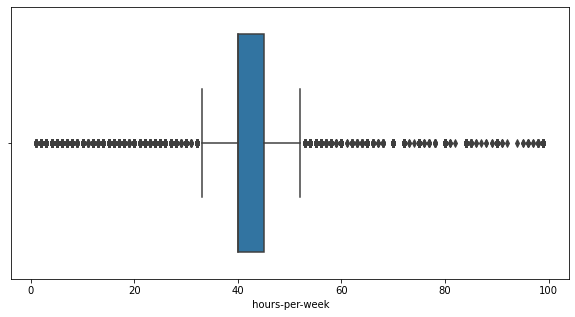

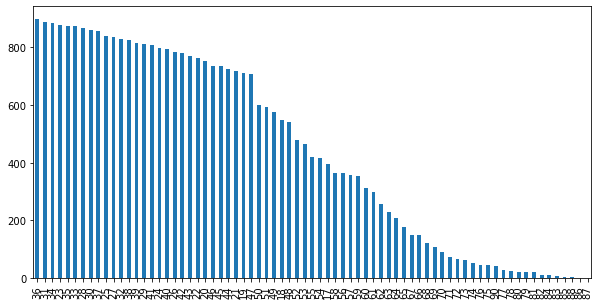

In [18]:
# импорт библиотек
import seaborn as sns
import matplotlib.pyplot as plt

fig, ax = plt.subplots(figsize=(10,5))
sns.boxplot(x = data[" hours-per-week"]);

fig, ax = plt.subplots(figsize=(10,5))
data['age'].value_counts().plot(kind='bar');

По первому графику можно посмотреть наличие выбросов признака hours-per-week, в нем достаточно много выбросов

По второму графику видно экспоненциальное распределение возраста людей

6. Разбить выборку на обучающую и тестовую.


In [19]:
from sklearn.model_selection import train_test_split

# разбиение на тестовую и обучающую выборку
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42) # 80% обучающей выборки

7. Работа по вариантам.

Вариант 2. Описательный анализ и визуализация данных.
Данный вариант предполагает фокусировку на исследовании данных и визуализации. При решении этого варианта следует провести как можно более подробный описательный анализ данных с использованием максимального спектра средств визуализации. При этом следует делать значимые выводы об обнаруженных в данных закономерностях.


In [30]:
data.head()

,age,workclass,fnlwgt,education,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country,income
0,39,State-gov,77516,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,<=50K
1,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
2,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
3,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
4,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K


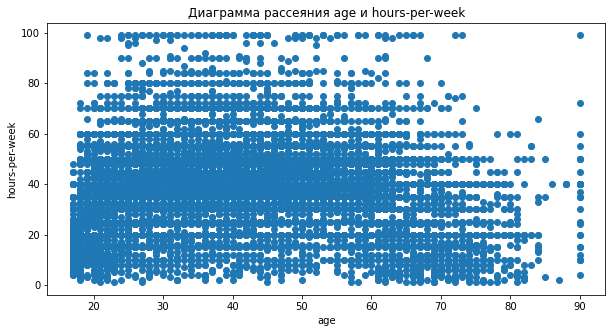

In [32]:
fig, ax = plt.subplots(figsize=(10,5))
plt.scatter(x = data['age'], y = data[' hours-per-week'])

plt.title('Диаграмма рассеяния age и hours-per-week') #title
plt.xlabel('age') #x label
plt.ylabel('hours-per-week') #y label
plt.show();

Можно посмотреть распределение возраста людей относительно часов работы

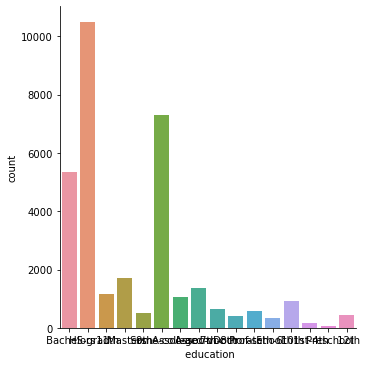

In [36]:
sns.catplot(data=data, x=' education', kind="count"); 

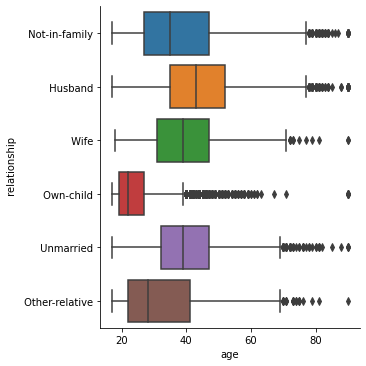

In [37]:
sns.catplot(data=data, x="age", y=" relationship", kind="box")

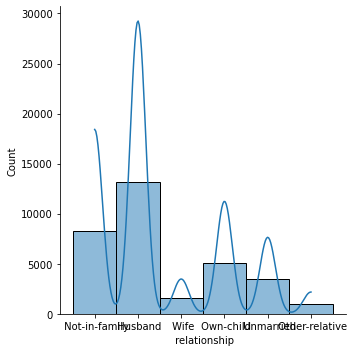

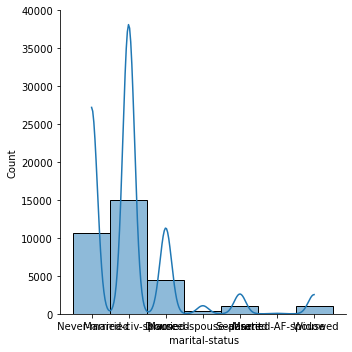

In [39]:
sns.displot(x=data[' relationship'], kde=True, label=' relationship') # kde - график плотности
sns.displot(x=data[' marital-status'], kde=True, label=' marital-status')

Оба этих признака очень похожи, потому можно удалить один из них и повысить интрепритируемость данных

In [40]:
x = pd.DataFrame(data.drop([' marital-status'], axis=1))

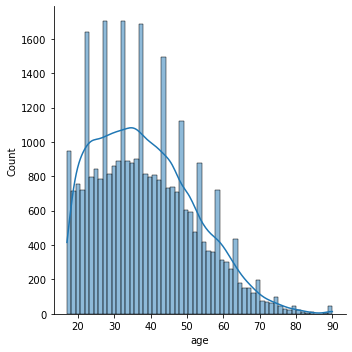

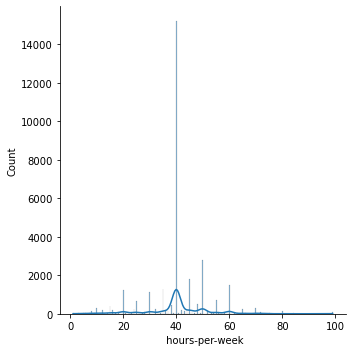

In [41]:
sns.displot(x=data['age'], kde=True, label='age') # kde - график плотности
sns.displot(x=data[' hours-per-week'], kde=True, label=' hours-per-week')

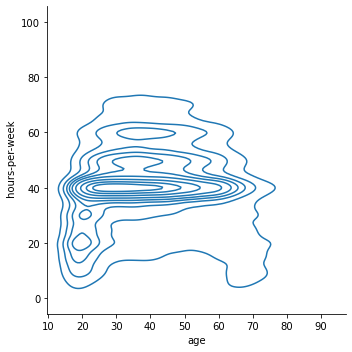

In [42]:
sns.displot(x="age",
            y=" hours-per-week",
            kind='kde',
            data=data);

Можно увидеть, где находится центр выборки в срезе возраста и часов работы

## Обучение моделей

In [20]:
x.head()

,age,workclass,fnlwgt,education,education-num,marital-status,occupation,relationship,race,sex,hours-per-week,native-country
0,39,State-gov,77516,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,40,United-States
1,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,13,United-States
2,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,40,United-States
3,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,40,United-States
4,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,40,Cuba


In [21]:
# выбор числовых признаков
numeric_subset = data.select_dtypes('number')

# выбор категориальных признаков
categorical_subset = data[[' workclass', ' education', ' marital-status', ' occupation', ' relationship', ' race', ' sex', ' native-country']]

# one-hot кодировка для категориальных данных
categorical_subset = pd.get_dummies(categorical_subset)

# соединение двух датафреймов путем конкатинации
x = pd.concat([numeric_subset, categorical_subset], axis = 1)

# вывод результата
x.head()

,age,fnlwgt,education-num,capital-gain,capital-loss,hours-per-week,workclass_ ?,workclass_ Federal-gov,workclass_ Local-gov,workclass_ Never-worked,...,native-country_ Portugal,native-country_ Puerto-Rico,native-country_ Scotland,native-country_ South,native-country_ Taiwan,native-country_ Thailand,native-country_ Trinadad&Tobago,native-country_ United-States,native-country_ Vietnam,native-country_ Yugoslavia
0,39,77516,13,2174,0,40,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
1,50,83311,13,0,0,13,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
2,38,215646,9,0,0,40,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
3,53,234721,7,0,0,40,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
4,28,338409,13,0,0,40,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [22]:
data.head()

,age,workclass,fnlwgt,education,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country,income
0,39,State-gov,77516,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,<=50K
1,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
2,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
3,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
4,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K


In [23]:
y = y.replace({' income':{' <=50K':0, ' >50K':1}})

In [24]:
from sklearn.model_selection import train_test_split

# разбиение на тестовую и обучающую выборку
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42) # 80% обучающей выборки

In [25]:
# создаем сводную таблицу метрик моделей
scores = pd.DataFrame(
    columns=['accuracy', 'precision', 'recall', 'f1_score', 'time'],
    index=[
        'LogisticRegression',
        'SVC linear',
        'SVC gauss',
        'KNeighborsClassifier'
    ]
)


In [26]:
from sklearn import metrics

def get_metrics(y_test, y_pred):
    accuracy = metrics.accuracy_score(y_test, y_pred)
    precision = metrics.precision_score(y_test, y_pred)
    recall = metrics.recall_score(y_test, y_pred)
    f1_score = metrics.f1_score(y_test, y_pred)
    return pd.Series(
        (accuracy, precision, recall, f1_score),
        index=['accuracy', 'precision', 'recall', 'f1_score']
    )

In [27]:
import time

def model_and_metrics(model):
    start = time.time() # точка отсчета времени
    model.fit(x_train, y_train.values.ravel())
    y_pred = model.predict(x_test)  
    end = time.time() - start # время работы программы
    returned = get_metrics(y_test.values.ravel(), y_pred).append(pd.Series((end), index = ['time']))
    return returned

In [28]:
from sklearn.linear_model import LogisticRegression

# Логистическая регрессия
model = LogisticRegression()
scores.iloc[0] = model_and_metrics(model)

In [ ]:
from sklearn import svm

# Метод опорных векторов c ядром линейной функции
model = svm.SVC(kernel='linear')
scores.iloc[1] = model_and_metrics(model)

In [ ]:
from sklearn import svm

# Метод опорных векторов c ядром радиальной базисной функции
model = svm.SVC(kernel='rbf')
scores.iloc[2] = model_and_metrics(model)

In [ ]:
from sklearn.neighbors import KNeighborsClassifier

# k ближайших соседей
model = KNeighborsClassifier()
scores.iloc[3] = model_and_metrics(model)

После обучения моделей можно сравнить их качество и выделить лучшие

In [ ]:
scores